# Welcome to Chaiverse! 👩‍🚀👽👾


[![Chaiverse Banner](https://imgur.com/vUn3OXJ.png)](https://www.chai-research.com/competition.html)

## In this demo, you will be:

###  • 🏋️ Train your own 7B LLaMA2 Model
###  • 🚀 Deploy your own model to the Chai competition
### • 📖 Getting real-time user feedback for your model
### • 🏅 Browsing through the Chai leaderboard

## 1. 🏋️ Model Training

In [ ]:
import chaiverse as cv

By partenering up with Axolotl, w've abstracted all the tedious part of training a large-language-model into a "scikit-learn" format, literally just load your dataset and call `model.fit`

In [ ]:
model = cv.LLaMA7b()
dataset = cv.load_dataset('ChaiML/davinci_150_examples', 'chatml')

model.fit(dataset, output_dir='dummy_run', num_epochs=1)

The fitted model is not very different from a transformer model, and supports direct submission to huggingface. First, login to your huggingface account and find your access token

In [ ]:
import huggingface_hub
huggingface_hub.notebook_login()

Next, upload your model directly to huggingface 🤗

In [ ]:
MODEL_URL = # {Your huggingface name}/{your model name}
model.push_to_hub(MODEL_URL, private=False)

## 2. 🚀 Deploying to Chai

In [ ]:
import chai_guanaco as cg

In [ ]:
cg.developer_login()

You can modify the model generation parameters, note: once your model is deployed, it will be generating texts using the parameters you've selected.

The model submission goes through (roughly speaking) three stages:
1. We will download your model from Huggingface
2. We will load it, cast it to float 16 then Tritonize it (this saves us 💰)
3. We will deploy and load balance the model and verify it via a stress-checker (so we know it is robust against rea-life usage)

Each stage's speed is subject to the kind of machines your job is allocated to, so in total it will take between 5 - 20 minutes

**Note: pending animation unfortunately does not show up in google Colab / Jetbrain notebook**

In [ ]:
generation_params = {
    'temperature': 1.0,
    'repetition_penalty': 1.5,
    'top_p': 0.2,
    "top_k": 40,
    "stopping_words": ['\n'],
    "presence_penalty": 1.5,
    "frequency_penalty": 0.
    }
submission_parameters = {
    'model_repo': MODEL_URL,
    'generation_params': generation_params,
    'model_name': 'my-awesome-llama'# your custom model name (can call it anything so you can remember it)
}
submitter = cg.ModelSubmitter()
submission_id = submitter.submit(submission_parameters)

## 3. 💬 Chat with Your Submission

Once your model is deployed, you can verify its behaviour and raw input. We have provided a range of bots that you can chat with (these are the bots that appear on the current Chai App leaderboard and are user-generated)

In [ ]:
chatai = cg.SubmissionChatbot(submission_id)
chatai.show_available_bots()

In [ ]:
chatai.chat('nerd_girl')

## 4. 📖 Getting Real-time User Feedback

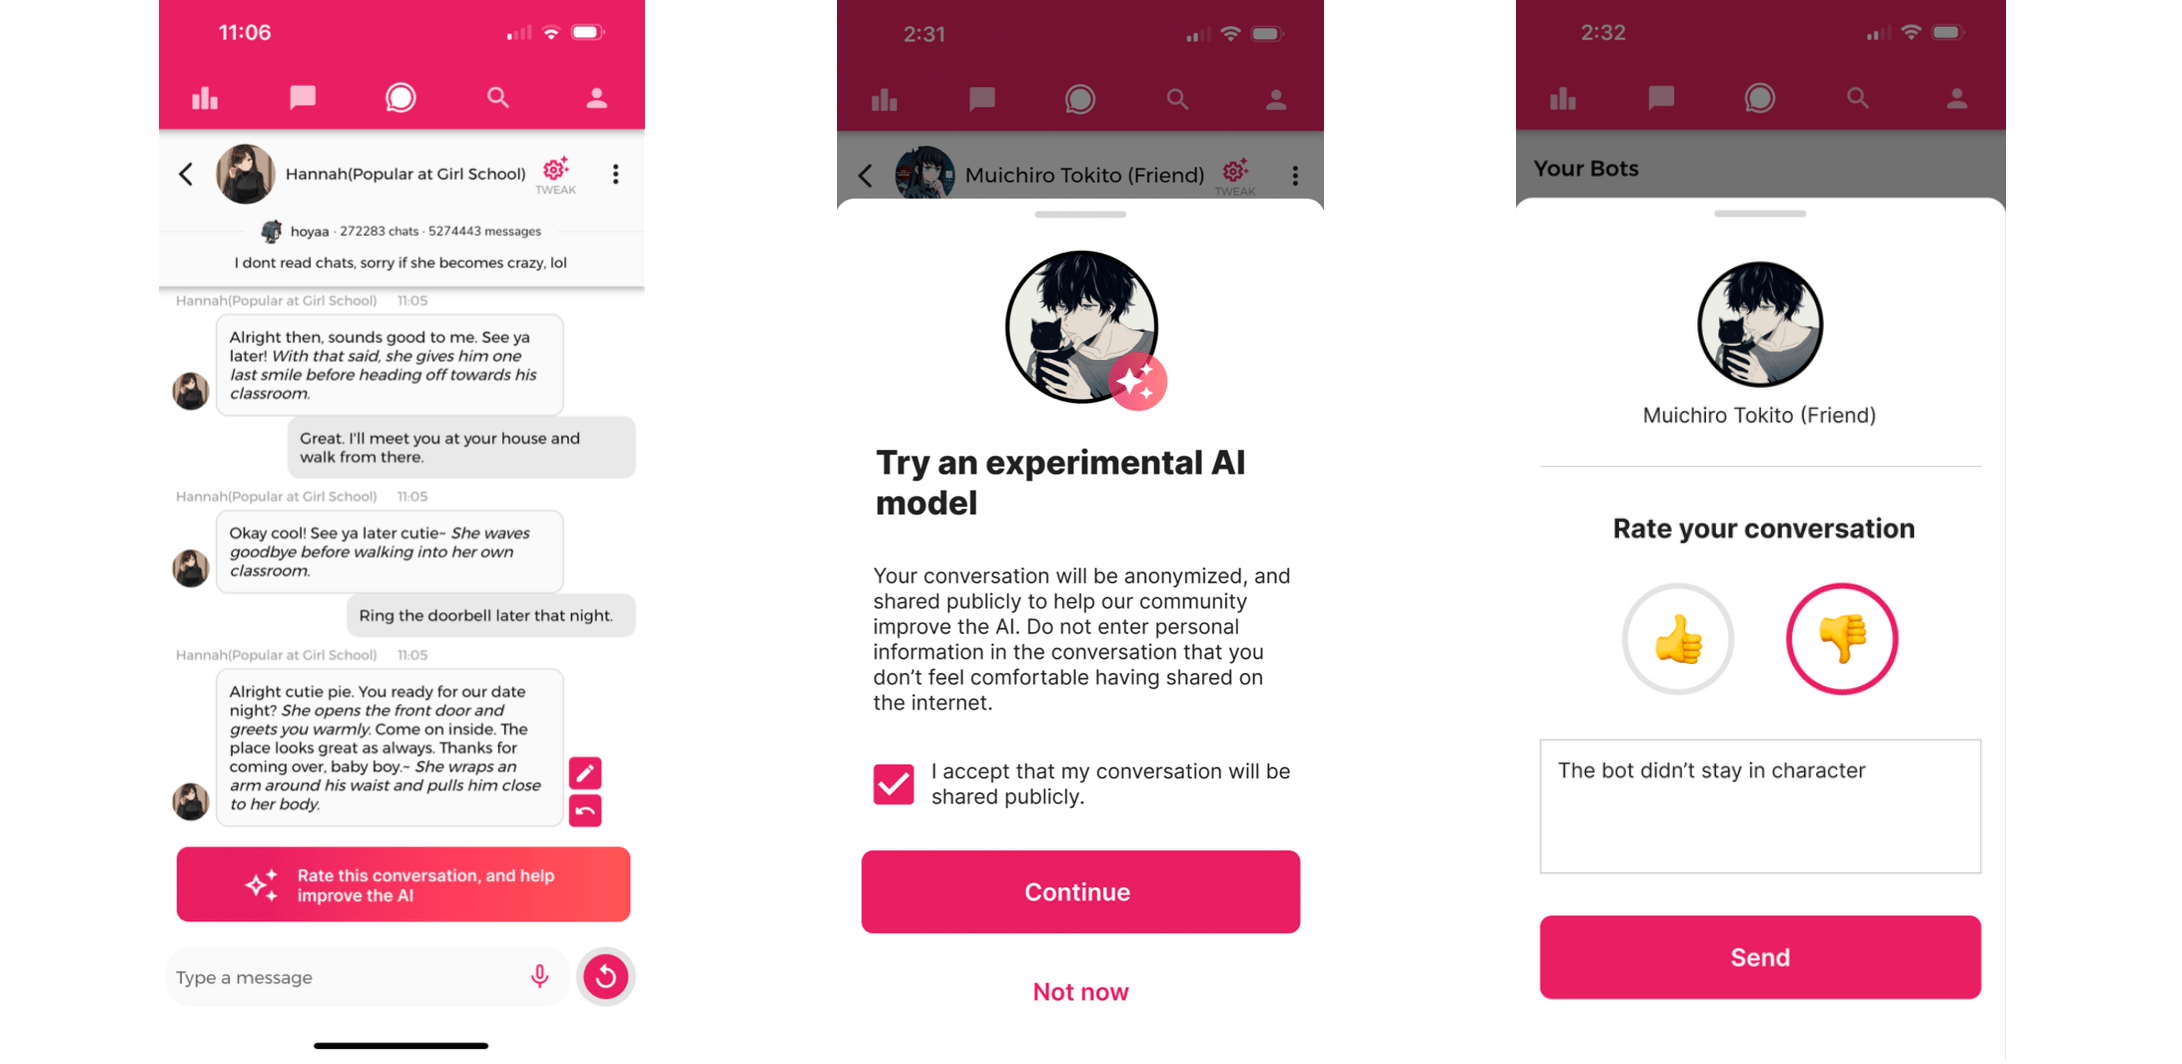
Now your model is deployed to the Chai platform, real users who enter the "battle mode" on the app will be able to speak with your model. They will rate your model and provide you with verbal feedback. We hope the verbal feedback will help you with the model development process :)

In [ ]:
model_feedback = cg.get_feedback(submission_id)
model_feedback.sample()

In the text above, the Feedback section in green is a Chai user's feedback for the entire conversation they've had with your model.

If you find a bot which says "deleted" it means the user has "retried" the message, i.e. they were not happy with it and decided to re-roll the message.

The `Feedback` object returned also has two attributes: `df` and `raw_data`, which contains the formatted and raw feedback data respectively. We hope you will find these useful.

In [ ]:
df = model_feedback.df
df.head()

In [ ]:
raw_data = model_feedback.raw_data

## 5. 🏅 Browse through the Chai Leaderboard

You are all done! Check your model performance and win prizes 💸💸💸

In [ ]:
leaderboard = cg.display_leaderboard()

In [ ]:
leaderboard = cg.display_leaderboard(detailed=True)

## Appendix: Getting Your Submission IDs + Deactivating Models 😶‍🌫️

In case you've forgotten/ lost track with your submission IDs, you can easily retrieve them by running:

In [ ]:
submission_ids = cg.get_my_submissions()
submission_ids

By default, we only allow 1 active model (i.e. a model that is being served to users) per developer key. Let's tear down the dummy (Pygmalion) model we've just submitted so you can submit a model of your own:

In [ ]:
for sub_id, status in submission_ids.items():
    if status in ['deployed', 'pending']:
        chai.deactivate_model(sub_id)

## A Collaboration Between
[![Collaboration Banner](https://imgur.com/8oJSWan.png)](https://github.com/OpenAccess-AI-Collective/axolotl)

## Sponsored By
[![Sponsorship Banner](https://imgur.com/yovi11c.png)](https://www.coreweave.com/)